In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#importing the libraries necessary for the project

In [2]:
dataset=pd.read_csv('/content/Financial Dataset - 1.csv')
dataset
#uploading the data.This section also shows the size of our dataframe

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [3]:
#indicates number of values in each column the respective data types.This also infers those without.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [4]:
#this gives a brief desciption of the int and float columns of the data. while we could ignore 
#the mean,std and percentiles for the year column as this is irrelevant,we have however identified an anomaly with the year column max year being 2056 instead of 2018
#Note that this function ignores the Nan values.
dataset.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [5]:
#checking the number of missing data in the respective columns.
dataset.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [6]:
dataset.sort_values(by='uniqueid')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
14803,Tanzania,2017,uniqueid_1,No,Rural,Yes,1.0,22.0,Female,Child,Divorced/Seperated,Secondary education,No Income
21423,Uganda,2018,uniqueid_1,No,Rural,No,5.0,32.0,Female,Head of Household,Divorced/Seperated,Primary education,Other Income
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7.0,18.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6077,Rwanda,2016,uniqueid_10,Yes,Urban,Yes,4.0,28.0,Male,Child,Single/Never Married,Tertiary education,Formally employed Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,Kenya,2018,uniqueid_998,No,Urban,Yes,1.0,35.0,Female,Head of Household,Single/Never Married,Primary education,Informally employed
998,Kenya,2018,uniqueid_999,No,Rural,Yes,5.0,35.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
15801,Tanzania,2017,uniqueid_999,No,Urban,Yes,2.0,42.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
22421,Uganda,2018,uniqueid_999,No,Rural,No,8.0,30.0,Female,Spouse,Married/Living together,Primary education,Other Income


In [7]:
#drop unique ID since it is an identifier with no correllation to whether one has a bank account. 
#This is also because different countries used the same naming format so there are similar unique IDs for different countries

dataset.drop(columns=['uniqueid'], inplace=True)
dataset


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [8]:
dataset.sort_values(by='year')

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
11761,Rwanda,2016,Yes,Rural,Yes,5.0,45.0,Female,Head of Household,Married/Living together,Secondary education,Other Income
9863,Rwanda,2016,No,Rural,Yes,4.0,26.0,Female,Child,Single/Never Married,Primary education,Farming and Fishing
9864,Rwanda,2016,Yes,Rural,Yes,4.0,38.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9865,Rwanda,2016,No,Urban,Yes,5.0,20.0,Female,Child,Single/Never Married,Primary education,Formally employed Private
9866,Rwanda,2016,No,Rural,Yes,6.0,56.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
...,...,...,...,...,...,...,...,...,...,...,...,...
4044,Kenya,2018,Yes,Rural,Yes,3.0,33.0,Female,Spouse,Married/Living together,Vocational/Specialised training,Formally employed Government
4076,Kenya,2018,No,Rural,Yes,2.0,56.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
213,Kenya,2029,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
7014,Rwanda,2039,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [9]:
#Dropping the outliers in the year field because the data source covered the years 2016,2017,2018. There are 3 such entries so dropping  them shouldnt affect our conclusion
dataset.drop(index=[213,7014,308],inplace=True)



In [10]:
dataset

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [11]:
dataset.isna().sum()

country                   14
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [12]:
#filtering out the rows with no values in the country column
nocountry = dataset[dataset['country'].isnull()]
nocountry

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
18200,NaN,2017,No,Urban,Yes,1.0,25.0,Female,Spouse,Single/Never Married,Primary education,Remittance Dependent
18201,NaN,2017,No,Urban,No,1.0,60.0,Female,Head of Household,Widowed,Primary education,Self employed
18202,NaN,2017,No,Urban,Yes,1.0,19.0,Female,Spouse,Single/Never Married,Primary education,No Income
18203,NaN,2017,No,Urban,No,1.0,62.0,Female,Head of Household,Widowed,No formal education,Self employed
18204,NaN,2017,No,Urban,No,2.0,42.0,Female,Head of Household,Widowed,No formal education,Self employed
18205,NaN,2017,No,Rural,No,3.0,18.0,Male,Child,Divorced/Seperated,Secondary education,Remittance Dependent
18206,NaN,2017,No,Urban,Yes,2.0,73.0,Female,Head of Household,Married/Living together,No formal education,Self employed
18207,NaN,2017,No,Urban,No,1.0,40.0,Male,Head of Household,Widowed,No formal education,Self employed
18208,NaN,2017,No,Urban,No,3.0,28.0,Male,Parent,Married/Living together,No formal education,Self employed
18312,NaN,2017,No,Urban,No,2.0,19.0,Male,Parent,Divorced/Seperated,Secondary education,No Income


In [13]:
# since all the missing values were taken in 2017 when Tanzania's data was taken, we replace the no value wuith Tanzania
dataset['country']= dataset['country'].fillna('Tanzania')

In [14]:
#check which columns have null values.
dataset.isnull().sum().sort_values()

country                    0
year                       0
The relathip with head     4
Cell Phone Access         11
Type of Location          15
household_size            28
Level of Educuation       29
Type of Job               30
marital_status            32
Respondent Age            34
gender_of_respondent      34
Has a Bank account        36
dtype: int64

In [15]:
#filtering out the different countries.
kenyadf= dataset[dataset['country']=='Kenya']
ugandadf=dataset[dataset['country']=='Uganda']
tanzaniadf=dataset[dataset['country']=='Tanzania']
rwandadf=dataset[dataset['country']=='Rwanda']

In [16]:
#checking missing data for each country.
kenyadf.info()  
ugandadf.info()
tanzaniadf.info()
rwandadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6066 entries, 0 to 6067
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 6066 non-null   object 
 1   year                    6066 non-null   int64  
 2   Has a Bank account      6066 non-null   object 
 3   Type of Location        6066 non-null   object 
 4   Cell Phone Access       6066 non-null   object 
 5   household_size          6066 non-null   float64
 6   Respondent Age          6062 non-null   float64
 7   gender_of_respondent    6062 non-null   object 
 8   The relathip with head  6066 non-null   object 
 9   marital_status          6066 non-null   object 
 10  Level of Educuation     6066 non-null   object 
 11  Type of Job             6066 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 616.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 21423 to 23523
Data col

In [17]:
#checking on missing data
kenyadf[kenyadf['Respondent Age'].isnull()]

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
436,Kenya,2018,No,Rural,Yes,2.0,NaN,NaN,Head of Household,Widowed,Primary education,Farming and Fishing
437,Kenya,2018,No,Rural,Yes,1.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Farming and Fishing
438,Kenya,2018,Yes,Urban,Yes,2.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Formally employed Government
439,Kenya,2018,No,Rural,Yes,10.0,NaN,NaN,Spouse,Married/Living together,Primary education,Farming and Fishing


In [18]:
kenyadf.describe()

,year,household_size,Respondent Age
count,6066.0,6066.000000,6062.000000
mean,2018.0,3.986977,39.624051
std,0.0,2.336067,17.215858
min,2018.0,1.000000,16.000000
25%,2018.0,2.000000,26.000000
50%,2018.0,4.000000,35.000000
75%,2018.0,5.000000,50.000000
max,2018.0,21.000000,95.000000


In [19]:

kenyadf['gender_of_respondent'].value_counts(normalize=True)

Female    0.574068
Male      0.425932
Name: gender_of_respondent, dtype: float64

In [20]:
#replacing Nan values in repodent age with median age to maintain consistency with overall dataset.Avoided mean since it is affected by outliers.


kenyadf.loc[436, 'Respondent Age'] = 35
kenyadf.loc[437, 'Respondent Age'] = 35
kenyadf.loc[438, 'Respondent Age'] = 35
kenyadf.loc[439, 'Respondent Age'] = 35

#replacing the Nan vales in gender_of_respondent with an equal amount of male and female to maintain consistency with overall dataset

kenyadf.loc[436, 'gender_of_respondent'] = 'Male' 	
kenyadf.loc[437, 'gender_of_respondent'] = 'Female'
kenyadf.loc[438, 'gender_of_respondent'] = 'Male' 	
kenyadf.loc[439, 'gender_of_respondent'] = 'Female'
kenyadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6066 entries, 0 to 6067
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 6066 non-null   object 
 1   year                    6066 non-null   int64  
 2   Has a Bank account      6066 non-null   object 
 3   Type of Location        6066 non-null   object 
 4   Cell Phone Access       6066 non-null   object 
 5   household_size          6066 non-null   float64
 6   Respondent Age          6066 non-null   float64
 7   gender_of_respondent    6066 non-null   object 
 8   The relathip with head  6066 non-null   object 
 9   marital_status          6066 non-null   object 
 10  Level of Educuation     6066 non-null   object 
 11  Type of Job             6066 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 745.1+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [21]:
kenyadf.describe()


,year,household_size,Respondent Age
count,6066.0,6066.000000,6066.000000
mean,2018.0,3.986977,39.621002
std,0.0,2.336067,17.210590
min,2018.0,1.000000,16.000000
25%,2018.0,2.000000,26.000000
50%,2018.0,4.000000,35.000000
75%,2018.0,5.000000,50.000000
max,2018.0,21.000000,95.000000


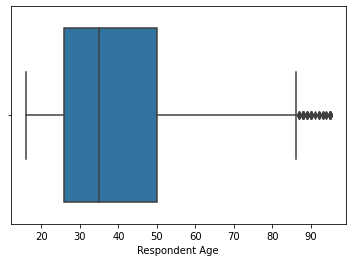

In [22]:
#checking outliers in respodents age using boxplots. 
#this means half of the respondents were below 35 years, while the other half above 35 years.
#From the below boxplot number and above the first quartile(Q1) is at 26 and thhird quartile(Q3) is 50 
#The interquartile range is 24.
#The outliers are defined as any respondents that lie in Q1-1.5IQR and Q3+ 1.5IQR. In this case, any respondents between -10(none) or
#any respondents above 86
#Range is the difference between the highest and lowest respondent age = 79
#Variance, a measure of how much the data is dispersed is  296.16919. The larger the value the wider the data varies.

sns.boxplot(x=kenyadf['Respondent Age'])


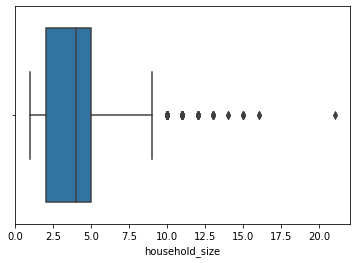

In [23]:
#checking outliers household size using boxplots
#From the below and above summary, the minimum household size is 1 maximun of 21. The IQR is 3.
#Any household size below -3.5(impossible) and above 9.5 is an outlier(shown below).
# Range is 20
#The varinace in this case is 5.4572
sns.boxplot(x=kenyadf['household_size'])


(array([   0., 1003.,  852.,  944.,  978.,  813.,  611.,  397.,  227.,
         129.,   57.,   24.,   14.,    8.,    2.,    4.,    2.,    0.,
           0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

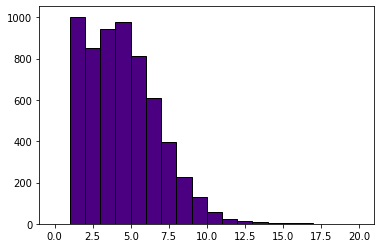

In [42]:
#Plotting a histgram of the household size with bins for each size stating 0
plt.hist(kenyadf['household_size'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],color='indigo',edgecolor='black')

(array([  0., 527., 691., 823., 794., 636., 551., 411., 380., 331., 242.,
        198., 219., 113.,  75.,  46.,  19.,  10.]),
 array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
         75,  80,  85,  90,  95, 100]),
 <a list of 18 Patch objects>)

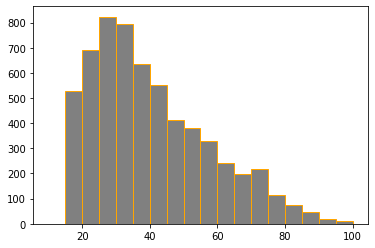

In [44]:
#ploting a histogram of 5 year age brackets.
plt.hist(kenyadf['Respondent Age'], bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],color='grey',edgecolor='orange')

In [66]:
#Checking how many male have bank accounts vs female
kenyadfgender=kenyadf.groupby('gender_of_respondent')
print(kenyadfgender.get_group('Male')['Has a Bank account'].value_counts())
print(kenyadfgender.get_group('Male')['Cell Phone Access'].value_counts())



No     1764
Yes     820
Name: Has a Bank account, dtype: int64
Yes    2112
No      472
Name: Cell Phone Access, dtype: int64


In [67]:
print(kenyadfgender.get_group('Female')['Has a Bank account'].value_counts())
print(kenyadfgender.get_group('Female')['Cell Phone Access'].value_counts())


No     2782
Yes     700
Name: Has a Bank account, dtype: int64
Yes    2671
No      811
Name: Cell Phone Access, dtype: int64


In [74]:
#Checking to see which gender has more bank accounts. Of the people with bank accounts 820 are male and 700 are female
kenyadfbank=kenyadf.groupby('Has a Bank account')
kenyadfbank.get_group("Yes")['gender_of_respondent'].value_counts()

Male      820
Female    700
Name: gender_of_respondent, dtype: int64

In [75]:
#Checking to see which loaction has more bank accounts. Of the people with bank accounts 906 are urban area and 614 are Rural area
kenyadfbank=kenyadf.groupby('Has a Bank account')
kenyadfbank.get_group("Yes")['Type of Location'].value_counts()


Urban    906
Rural    614
Name: Type of Location, dtype: int64

In [76]:
kenyadfbank=kenyadf.groupby('Has a Bank account')
kenyadfbank.get_group("Yes")['Respondent Age'].value_counts()

30.0    77
40.0    72
28.0    67
32.0    63
35.0    58
        ..
81.0     1
90.0     1
89.0     1
93.0     1
95.0     1
Name: Respondent Age, Length: 77, dtype: int64

(array([ 9.,  8., 12.,  4.,  1.,  4.,  2.,  2.,  1.,  2.,  1.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.]),
 array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
         75,  80,  85,  90,  95, 100]),
 <a list of 18 Patch objects>)

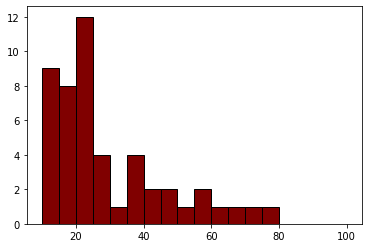

In [78]:
#ploting a histogram with the diffrent age sets who have bank accounts
plt.hist(kenyadfbank.get_group("Yes")['Respondent Age'].value_counts(),[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],edgecolor='black',color='maroon')



In [33]:
#datacleaning for uganda by replacing the missing data for the household size with the median household size for uganda.
ugandadf[ugandadf['Respondent Age'].isnull()]

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23513,Uganda,2018,No,Urban,Yes,NaN,26.0,Female,Head of Household,Married/Living together,Secondary education,No Income
23514,Uganda,2018,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income


In [34]:
#Getting the median household size for uganda
ugandadf['household_size'].describe()

count    2095.000000
mean        4.983771
std         2.893811
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        20.000000
Name: household_size, dtype: float64

In [37]:
#Replacing the missing data

ugandadf.loc[23513,'household_size'] = 5
ugandadf.loc[23514,'household_size'] = 5
ugandadf.loc[23515,'household_size'] = 5
ugandadf.loc[23516,'household_size'] = 5
ugandadf.loc[23517,'household_size'] = 5
ugandadf.loc[23518,'household_size'] = 5

ugandadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 21423 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2101 non-null   object 
 1   year                    2101 non-null   int64  
 2   Has a Bank account      2101 non-null   object 
 3   Type of Location        2101 non-null   object 
 4   Cell Phone Access       2101 non-null   object 
 5   household_size          2101 non-null   float64
 6   Respondent Age          2101 non-null   float64
 7   gender_of_respondent    2101 non-null   object 
 8   The relathip with head  2101 non-null   object 
 9   marital_status          2101 non-null   object 
 10  Level of Educuation     2101 non-null   object 
 11  Type of Job             2101 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 277.9+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#